# Voyager 1 Tutorial

*It's a Bird, It's a Plane, It's, It's... Voyager 1?!*

## Introduction

The goal of this tutorial is to take you through the whole "SETI Pipeline". That is, to take
real data gathered by the [Green Bank Telescope](https://en.wikipedia.org/wiki/Green_Bank_Telescope) in West Virginia, run it through a few algorithms, and see if we can't dig up an alien or two!

Spoiler alert: If you do everything right you WILL find what appears to possibly be an alien!

Second spoiler alert: It's not an alien.

But it *is* [Voyager 1](https://en.wikipedia.org/wiki/Voyager_1), the farthest human-made object from Earth! Which is still pretty fricking awesome if you ask me!!! :)))

The process by which we find Voyager 1 will be nearly identical to the process you will use to search
for aliens in other data sets. So buckle up and listen close: It's time to look for ET!

**NOTE**: For extra reference, check out the [First Voyager Tutorial](https://github.com/UCBerkeleySETI/blimpy/blob/master/examples/voyager.ipynb).

Also, [click here](https://youtu.be/EFxUHoXW1cA) if you'd like to watch a poster tour about the summer research project that this tutorial is based on.

## Background

One of the largest challenges in SETI's search is that human-generated radio frequency interference (RFI) from cell phones, Wi-Fi, radar, etc, is much more abundant and powerful than potential alien-generated signals. Therefore two primary techniques are used to quickly discriminate between human-made RFI and signals from outer space. They're pretty simple, effective, and understanding them is prerequisite for the rest of this tutorial. For a more thorough background discussion, [read through this document](https://github.com/UCBerkeleySETI/breakthrough/tree/master/GBT).

### Technique 1: Pointing the telescope ON and OFF Target (aka "Nodding")

   When a single dish radio telescope like Green Bank conducts an alien search, we program it to point directly at the target of interest (eg a star known to have an exoplanet in its "habitable zone") for 5 minutes, then point elsewhere for 5 minutes, then point back at the target for 5 minutes, then point some new place for 5 minutes, then back to the target for 5 minutes and finally 5 more minutes in a third new direction. If we call the observations pointing at the target "ON" observations and the observations pointing elsewhere "OFF" observations, the pattern looks like this:
   
   **1 "ON" --> 1 "OFF" --> 2 "ON" --> 2 "OFF" --> 3 "ON" --> 3 "OFF"**. In total, we do 3 five minute "ON" observations and 3 five-minute "OFF" observations, meaning the full search time for a particular target is half an hour!
    
   This is also referred to as an ABACAD pattern (for the alien-hunting songwriters amongst you, it could be fun to write a song about aliens with [the same song form](https://www.omarimc.com/a-complete-guide-to-song-form-structure-examples-aaba-aaa-abab-abac/) as a SETI-search ;-)
    
   Conducting the search in this manner takes advantage of the fact that **most RFI should appear regardless of which direction the telescope is pointed in, while signals from space should appear only when the telescope is pointed directly at them**. Therefore, if we see a signal present in all three ON target observations and absent in all three OFF target observations, we can be fairly confident that it's coming from space and not RFI!
    
### Technique 2: Nonzero Doppler Drift

   You may already be familiar with the concept of [Doppler Shift](https://en.wikipedia.org/wiki/Doppler_effect). But are you familiar with the concept of Doppler *Drift*? In short, Doppler Shift is a *constant* shift in frequency due to a *constant* relative velocity between two objects, whereas Doppler Drift is a *changing* shift in frequency due to a *changing* relative velocity between two objects. Since the Earth is rotating and orbiting (and space targets like exoplanets have their own changing velocities), things in outer space have a changing relative velocity to the Earth. Meanwhile, Earthbound objects have a constant velocity relative to Earth (usually zero). Therefore, **most RFI does NOT have a Doppler Drift while outer space targets DO have Doppler Drift**.
   
We take advantage of this fact to get rid of more RFI by rejecting all signals that have zero Doppler Drift!

## Overview
    
Now that we have an understanding of the theory underlying the differences between RFI and alien signals, let's talk about how we analyze the data collected by our telescopes. You can think of the data as a massive (and I mean **MASSIVE**) haystack. Somewhere in the haystack there *might* be a needle--an alien signal. Our job is to get rid of all of the hay--without getting rid of the needle--so that we can see the needle! Not easy!!

For SETI, the process of sifting through the hay to find the needle (data analysis) can be broken down into five steps that look something like this:

> **1. telescope data** (in .h5 or filterbank format) --> **2. turboSETI** (outputs .dat) --> **3. find_event** (outputs Pandas and .csv) --> **4. plot_event_pipeline** (outputs corresponding time vs frequency graph with power indicated by color for each of the find_event hits you see in the Pandas dataframe) --> **5. plot_spectrum.py"** (outputs a power vs frequency graph)

Here's a quick explanation for each of these parts. The rest of this tutorial will go into more depth, but it's good to have an overview to start:

**1. telescope data**: The data that the telescope gathered should be stored somewhere in .h5 or filterbank format. For the purposes of this tutorial, I will assume we are using .h5 formatting but it shouldn't make a difference if you're using a filterbank file.

**2. turboSETI**: The main algorithm that processes the data collected from the telescopes in .h5 format and outputs
    .dat files. For this tutorial we'll intentionally be using small files so that you can use turboSETI with your computer at home. However, with the multiple Gigabyte-sized .h5 files from real radio telescope observations, turboSETI takes a long time to run (hours). Therefore, if you are going to run turboSETI on a large file and have permission, it's wise to connect to Berkeley's server using ssh and let the big computers do the work. [Here's one](https://github.com/DominicL3/hey-aliens/blob/master/multihop-ssh.md) and [here's another](https://semaphoreci.com/community/tutorials/getting-started-with-ssh) useful resource for setting up ssh. Once logged in you can use [tmux](https://github.com/tmux/tmux/wiki) or [screen](https://linuxize.com/post/how-to-use-linux-screen/) to allow turboSETI to continue running while your computer is disconnected from the Berkeley server. [Here](https://www.hamvocke.com/blog/a-quick-and-easy-guide-to-tmux/) is a helpful guide for using tmux. The most important section is on "session handling". The basic idea is: connect to Berkeley's server, activate tmux-->Run turboSETI-->detach from the session. You can then attach to the session again later to check if turboSETI is finished doing its thang!

**3. find_event.py**: The script that works in conjuction with **find_event_pipeline.py** to take in turboSETI's .dat files and outputs a Pandas dataframe that includes all events above a certain threshold AND a .csv file that you will manually input to plot_event_pipeline. When you think of find_event.py,      picture something like this (this is what a Pandas dataframe looks like): 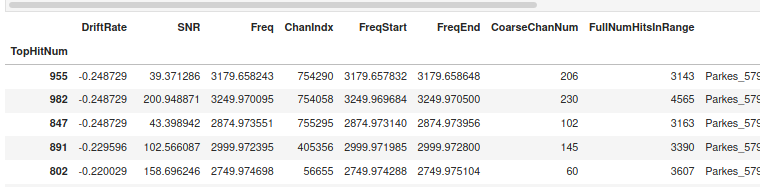
    
**4. plot_event_pipeline.py**: Do not confuse with **find_event_pipeline.py**!! This function takes in the output .csv from find_event.py and a .lst list of turboSETI's six .dat outputs (that you make--very easy) and gives you plots for each of the find_event.py hits that you see in the Pandas dataframe above! The plots are time vs frequency with power indicated by color. Importantly, as you can see below, there are SIX plots contained in one, corresponding to the six "ON/OFF" observations taken by the telescope. Each five minute (300 second) "ON" or "OFF" observation is separated by a horizontal black line. The uppermost five minute observation is the first "ON", followed underneath by the first "OFF", then the second "ON", etc. When you think of plot_event_pipeline.py, picture something like this: 

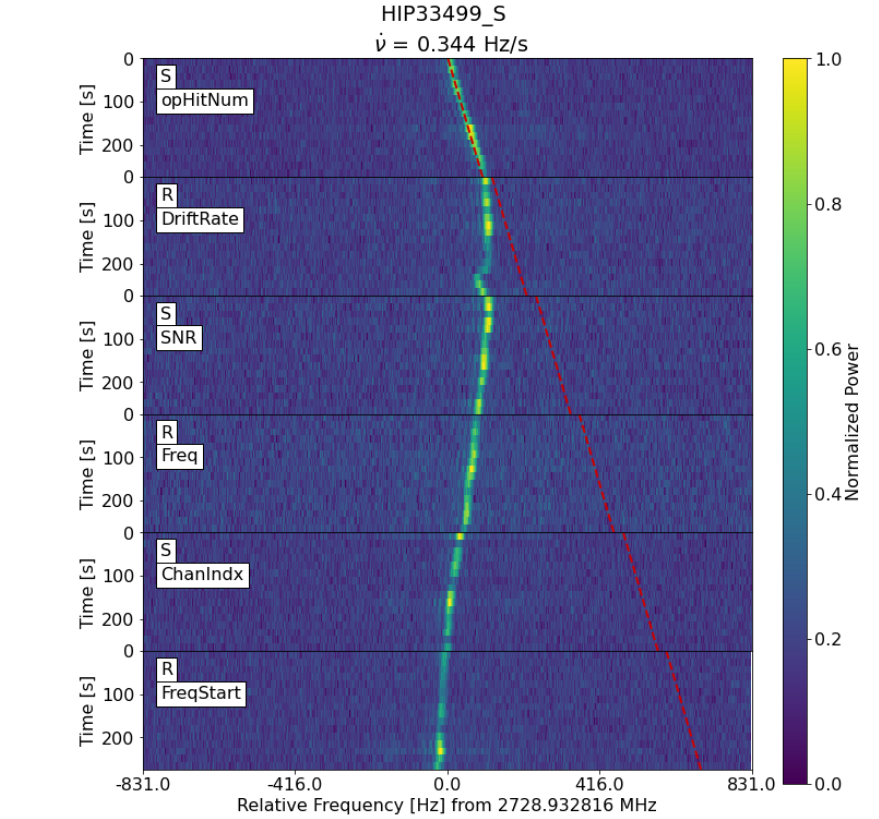

**5. plot_spectrum.py**: Input some telescope data (.h5 file) and a frequency range and it outputs a power vs frequency graph. Note that the plot_spectrum graph is giving you the SAME information as one of the six 300-second plot_event graphs above (in between two horizontal black lines), but with the times "collapsed" (added together) so that the signal's power is represented by the height of the graph instead of by its brightness, and the time period is now the entire 300 second observation. When you think of plot_spectrum.py, picture something like this:

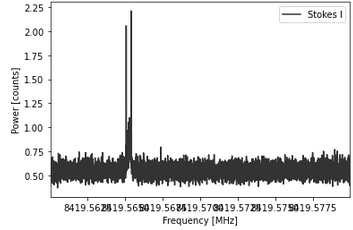

## 0. Setup
To start, open up your terminal. We're going to set up a new terminal "environment" which we'll call turboSETI. To do this, enter the following in your bash terminal:

`$ conda deactivate #deactivates your current environment`  
`$ conda create -n turboSETI #creates a new environment called turboSETI`  
`$ conda activate turboSETI #activates the new turboSETI environment`  
`$ conda install pip #installs the python package manager called pip`  

`$ python3 -m pip install -U git+https://github.com/UCBerkeleySETI/blimpy #installs the blimpy package`  
`$ python3 -m pip install -U git+https://github.com/UCBerkeleySETI/turbo_seti #installs the turboSETI program`

If you run into an error related to "llvmlite" here, make sure you have the latest version of pip installed on your machine. Another possible solution is to use an older version of Python when creating your environment by using, for example, `$ conda create -n turboSETI3.7 python=3.7` and then `conda activate turboSETI3.7` and then the rest of the above code.

Now it's time to move into Jupyter Notebook! After creating a new notebook, use `%matplotlib inline` for proper formatting and then import the Python libraries we'll need:

In [5]:
%matplotlib inline
import pylab as plt
from blimpy import Waterfall
import turbo_seti.find_doppler.seti_event as turbo
import turbo_seti.find_event as find

ModuleNotFoundError: No module named 'blimpy'

That's it for the Setup! For more information about turboSETI, see the [turboSETI README.](https://github.com/UCBerkeleySETI/turbo_seti/blob/master/README.md)
You may also want to reference [Shane Smith's turboSETI usage tutorial here.](https://github.com/UCBerkeleySETI/turbo_seti/blob/master/tutorial/turboSETI_tutorial.ipynb)

## 1. Telescope Data

Next we need to get the Voyager 1 data collected by the Greenbank telescope on July 16th, 2020.

Download the data here (it's in .h5 format and each file is ~50 MB):

[First ON Observation](http://blpd14.ssl.berkeley.edu/voyager_2020/single_coarse_channel/single_coarse_guppi_59046_80036_DIAG_VOYAGER-1_0011.rawspec.0000.h5) single_coarse_guppi_59046_80036_DIAG_VOYAGER-1_0011.rawspec.0000.h5

[First OFF Observation](http://blpd14.ssl.berkeley.edu/voyager_2020/single_coarse_channel/single_coarse_guppi_59046_80354_DIAG_VOYAGER-1_0012.rawspec.0000.h5) single_coarse_guppi_59046_80354_DIAG_VOYAGER-1_0012.rawspec.0000.h5

[Second ON Observation](http://blpd14.ssl.berkeley.edu/voyager_2020/single_coarse_channel/single_coarse_guppi_59046_80672_DIAG_VOYAGER-1_0013.rawspec.0000.h5) single_coarse_guppi_59046_80672_DIAG_VOYAGER-1_0013.rawspec.0000.h5

[Second OFF Observation](http://blpd14.ssl.berkeley.edu/voyager_2020/single_coarse_channel/single_coarse_guppi_59046_80989_DIAG_VOYAGER-1_0014.rawspec.0000.h5) single_coarse_guppi_59046_80989_DIAG_VOYAGER-1_0014.rawspec.0000.h5

[Third ON Observation](http://blpd14.ssl.berkeley.edu/voyager_2020/single_coarse_channel/single_coarse_guppi_59046_81310_DIAG_VOYAGER-1_0015.rawspec.0000.h5) single_coarse_guppi_59046_81310_DIAG_VOYAGER-1_0015.rawspec.0000.h5

[Third OFF Observation](http://blpd14.ssl.berkeley.edu/voyager_2020/single_coarse_channel/single_coarse_guppi_59046_81628_DIAG_VOYAGER-1_0016.rawspec.0000.h5) single_coarse_guppi_59046_81628_DIAG_VOYAGER-1_0016.rawspec.0000.h5

## 2. turboSETI
Now that we have the Voyager data we want to run turboSETI on it to get a list of "hits".

**A hit is any signal from the Voyager data that is above a specified signal to noise ratio (SNR) threshold and within a specified (nonzero) doppler drift rate range.**

Thus, turboSETI acts as an important initial data "sieve" that gets rid of a lot of unwanted signals that are too weak (too small of an SNR) or almost certainly coming from Earth (due to their zero Doppler drift rate).

To run turboSETI on the Voyager data we first need to create a list with the file names we downloaded. One way to do this is as follows:
1. Move the downloaded files to your current working directory in Jupyter Notebook (In my case, I opened Jupyter from my ~/Desktop directory and then stored the files in a folder on my desktop called "VoyagerData").
2. Use the "glob" function to put them in .lst format. The glob function takes all files of a given format in your current working directory and puts them in a list, so make sure the Voyager files are the only files of this type in your current directory before using it.

You could also do this by hand, copying and pasting the file names into a .lst file, but who wants to pass up a chance to glob?!

In [7]:
import glob

voyager_list = glob.glob('VoyagerData/*.h5') #This takes all .h5 files in my VoyagerData folder and puts them in a list

print(voyager_list)

['VoyagerData/single_coarse_guppi_59046_80036_DIAG_VOYAGER-1_0011.rawspec.0000.h5', 'VoyagerData/single_coarse_guppi_59046_80672_DIAG_VOYAGER-1_0013.rawspec.0000.h5', 'VoyagerData/single_coarse_guppi_59046_81628_DIAG_VOYAGER-1_0016.rawspec.0000.h5', 'VoyagerData/single_coarse_guppi_59046_81310_DIAG_VOYAGER-1_0015.rawspec.0000.h5', 'VoyagerData/single_coarse_guppi_59046_80989_DIAG_VOYAGER-1_0014.rawspec.0000.h5', 'VoyagerData/single_coarse_guppi_59046_80354_DIAG_VOYAGER-1_0012.rawspec.0000.h5']


Now that we have our files in a list we can run turboSETI with a for loop on them. This will take a minute or two on our six ~50 MB files but takes hours on the many Gigabyte-sized files turboSETI normally runs on:

In [3]:
from turbo_seti.find_doppler.find_doppler import FindDoppler
FindDoppler?

for file in voyager_list:
    doppler = FindDoppler(file,
                      max_drift = 4,
                      snr = 10,       
                      out_dir = './' # This is where the turboSETI output files will be stored. "./" is the current directory
                     )
    doppler.search()

Init signature:
FindDoppler(
    datafile,
    max_drift,
    min_drift=0,
    snr=25.0,
    out_dir='./',
    coarse_chans=None,
    obs_info=None,
    flagging=None,
    n_coarse_chan=None,
)
Init docstring:
Initializes FindDoppler object

Args:
    datafile (string):  Inputted filename (.h5 or .fil)
    max_drift (float):  Max drift rate in Hz/second
    min_drift (int):    Min drift rate in Hz/second
    snr (float):        Signal to Noise Ratio - A ratio bigger than 1 to 1 has more signal than  noise
    out_dir (string):   Directory where output files should be placed. By default this is the
                        current working directory.
    coarse_chans (list(int)):  the inputted comma separated list of coarse channels to analyze, if any.
    obs_info (dict):     Used to hold info found on file, including info about pulsars, RFI, and SEFD
    flagging (bool):     Flags the edges of the PFF for BL data (with 3Hz res per channel)
    n_coarse_chan (int): Number of coarse chann

After running turboSETI you should have a .dat file for each .h5 file you ran through it. These files are stored wherever you specify in the `out_dir = ` portion of the code. If you leave it the way it's written above `out_dir = './'` the .dat files will be stored in your current directory.

Remember, you can control the important `max_drift` and `snr` parameters when running turboSETI! Changing them and re-running turboSETI is a worthy exercise to see how they influence the number of hits you get. The difference between finding an alien and finding your eccentric neighbor's ham radio very well may depend on which numbers you choose...

The `max_drift` parameter sets the maximum doppler drift rate turboSETI will search for. In this case we set it to 4 Hz/s. Since the min_drift parameter is defaulted to 0 Hz/s, turboSETI will look for signals that are drifting between 0 and 4 Hz/s. TurboSETI will NOT include signals with a 0 Hz/s drift rate since the whole point is to exclude signals from Earth!

The `snr` parameter sets the minimum signal to noise ratio turboSETI will return as a hit. The lower the snr threshold you set, the more hits you'll get since turboSETI returns all hits above this lower limit.

## 3. find_event_pipeline

Now that we've run turboSETI on the data and gotten a list of hits, it's time to find "Events"! It's easy to get hits and events confused, so listen closely:

**An event is a hit that occurs in more than one "ON" observation and does not occur in any of the "OFF" observations.**

So, events are a much bigger deal than hits. Most hits are noise that's loud enough and doppler drifting with respect to the telescope for whatever reason (perhaps a satellite). But events require that the same hit be present only when looking at the target, and not when looking away. One day an event may prove to be an alien saying "Where you been all my life Earthlings?!" Quite the event that would be.

So, how do we find events? Well, we use `find_event_pipeline` of course!

Before we can run `find_event_pipeline`, however, we need to make a very simple `.lst` file with a list of the `.dat` outputs from turboSETI:

In [25]:
# Creating a simple .lst file of the .dat files that turboSETI produced

directory_constant = './' #You can edit this constant to match whichever directory you saved your .dat files to:

turboSETI_list = [directory_constant + 'single_coarse_guppi_59046_80036_DIAG_VOYAGER-1_0011.rawspec.0000.dat',
            directory_constant + 'single_coarse_guppi_59046_80354_DIAG_VOYAGER-1_0012.rawspec.0000.dat',
            directory_constant + 'single_coarse_guppi_59046_80672_DIAG_VOYAGER-1_0013.rawspec.0000.dat',
            directory_constant + 'single_coarse_guppi_59046_80989_DIAG_VOYAGER-1_0014.rawspec.0000.dat',
            directory_constant + 'single_coarse_guppi_59046_81310_DIAG_VOYAGER-1_0015.rawspec.0000.dat',
            directory_constant + 'single_coarse_guppi_59046_81628_DIAG_VOYAGER-1_0016.rawspec.0000.dat']

# This writes the .dat files into a .lst, as required by the find_event_pipeline:

with open(directory_constant + 'turboSETI_list.lst', 'w') as f:
    for item in turboSETI_list:
        f.write("%s\n" % item)
        
# You don't have to print, but it's a good way to check that your list is in the correct order:

with open(directory_constant + 'turboSETI_list.lst', 'r') as f:
    print(f.read())

./single_coarse_guppi_59046_80036_DIAG_VOYAGER-1_0011.rawspec.0000.dat
./single_coarse_guppi_59046_80354_DIAG_VOYAGER-1_0012.rawspec.0000.dat
./single_coarse_guppi_59046_80672_DIAG_VOYAGER-1_0013.rawspec.0000.dat
./single_coarse_guppi_59046_80989_DIAG_VOYAGER-1_0014.rawspec.0000.dat
./single_coarse_guppi_59046_81310_DIAG_VOYAGER-1_0015.rawspec.0000.dat
./single_coarse_guppi_59046_81628_DIAG_VOYAGER-1_0016.rawspec.0000.dat



Check to make sure the `.lst` list is in the correct order. It should be in the same order as the observations (FirstON, FirstOFF, SecondON, SecondOFF, ThirdON, ThirdOFF).

Now we run `find_event_pipeline` on the list:

In [8]:
#Using find_event_pipeline with filter threshold 3 to detect Voyager!
from turbo_seti.find_event.find_event_pipeline import find_event_pipeline

find_event_pipeline('turboSETI_list.lst', filter_threshold = 3, number_in_cadence = 6)

ModuleNotFoundError: No module named 'turbo_seti'

Importantly, `find_event_pipeline` allows you to choose a `filter_threshold` of 1, 2 or 3.

`filter_threshold = 1` returns **hits** that meet turboSETI's SNR/non-zero drift criteria, but with no ON/OFF check  
`filter_threshold = 2` reports **events** where a signal is found in at least one ON and is absent in all three OFFs
`filter_threshold = 3` report **events** where a signal was found in all three ONs and absent in all three OFFs

So `filter_threshold = 3` is the strictest setting. For an event to be worthy of serious further study it usually has to pass filter_threshold 3.

Also, note that `number_in_cadence` is the total number of ON and OFF target observations that occurred. For our Voyager observations (and most SETI searches), this number is 6 (three ONs and three OFFs).

## 4. plot_event_pipeline


Plotting some events for:  VOYAGER-1
There are 6 total events in the csv file /home/elavie/DIAG_VOYAGER-1_f3_snr10.csv
therefore, you are about to make 6 .png files.


Do you wish to proceed with these settings? (y/n):  y



*************************************************
***     The Parameters for This Plot Are:    ****
Target =  VOYAGER-1
Bandwidth =  0.00163  MHz
Time Elapsed (inc. Slew) =  1866.0  s
Middle Frequency =  8419.5654  MHz
Expected Drift =  -0.3635  Hz/s
*************************************************
*************************************************


*************************************************
***     The Parameters for This Plot Are:    ****
Target =  VOYAGER-1
Bandwidth =  0.0018  MHz
Time Elapsed (inc. Slew) =  1866.0  s
Middle Frequency =  8419.5652  MHz
Expected Drift =  -0.4018  Hz/s
*************************************************
*************************************************


*************************************************
***     The Parameters for This Plot Are:    ****
Target =  VOYAGER-1
Bandwidth =  0.00184  MHz
Time Elapsed (inc. Slew) =  1866.0  s
Middle Frequency =  8419.5649  MHz
Expected Drift =  -0.4114  Hz/s
*******************************************

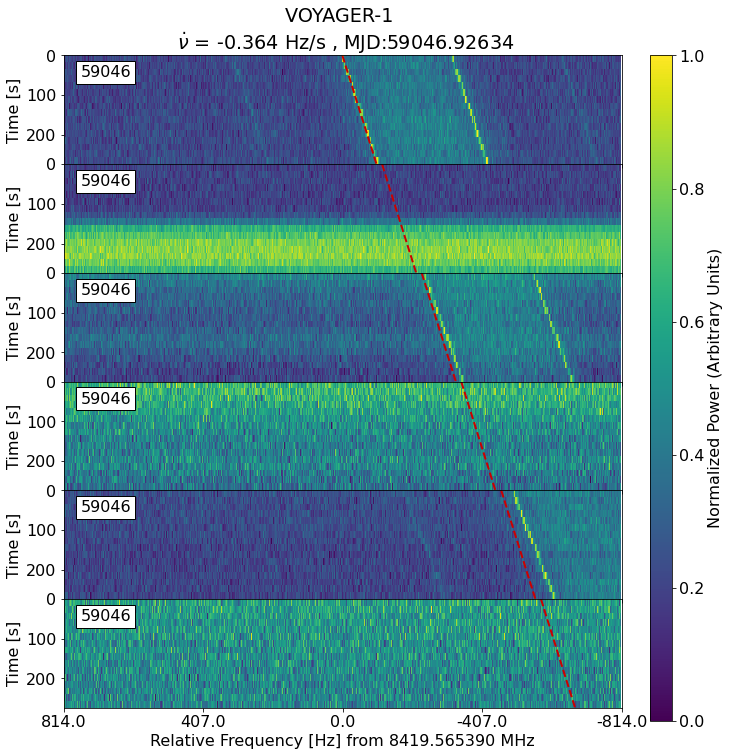

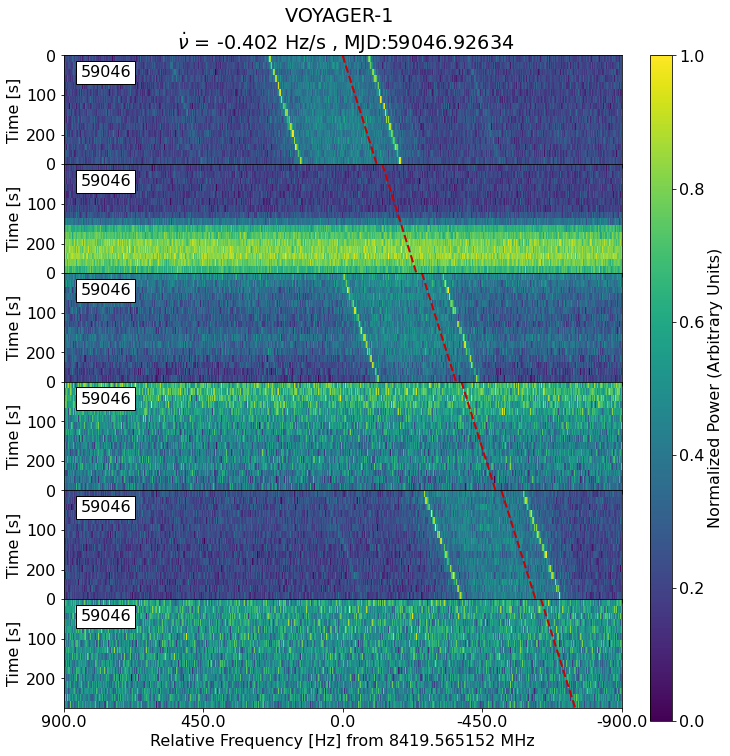

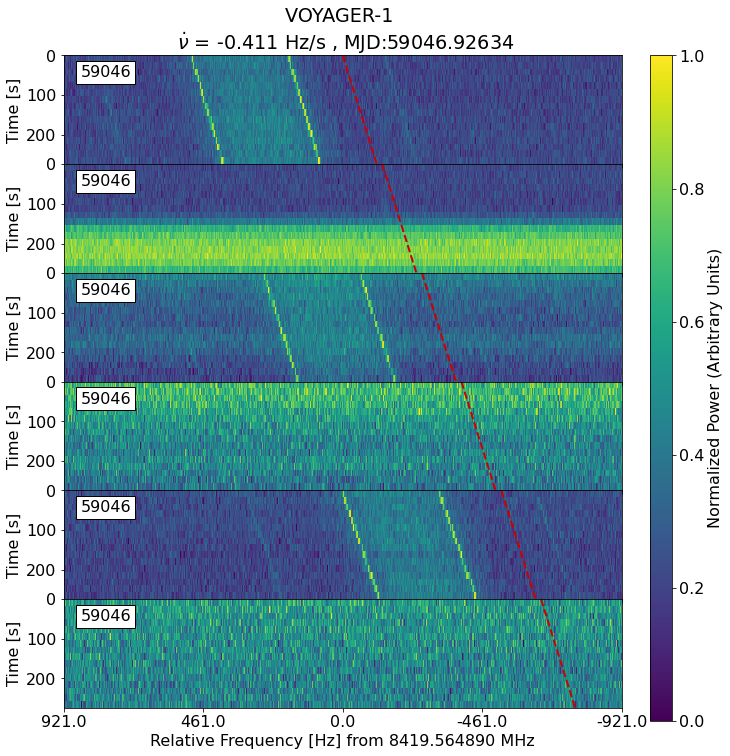

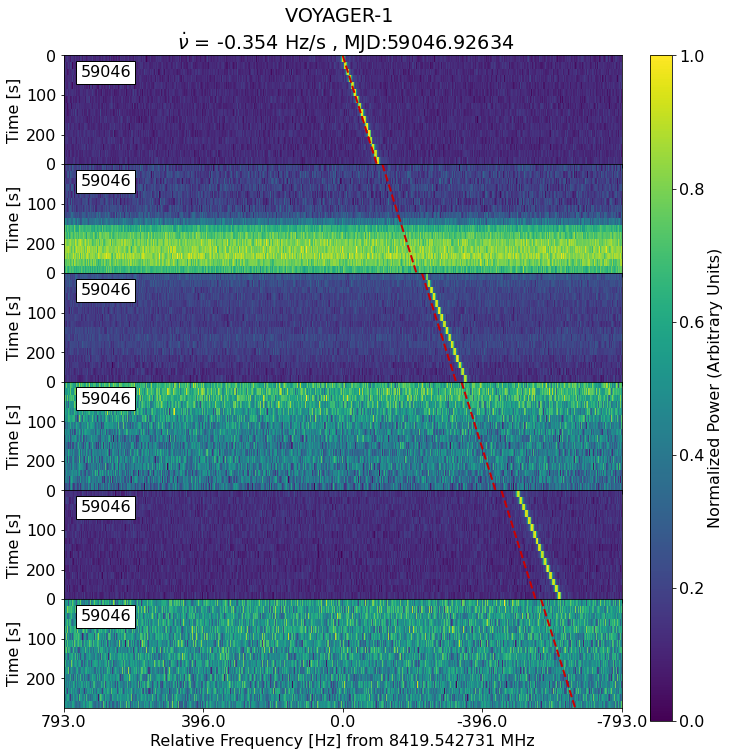

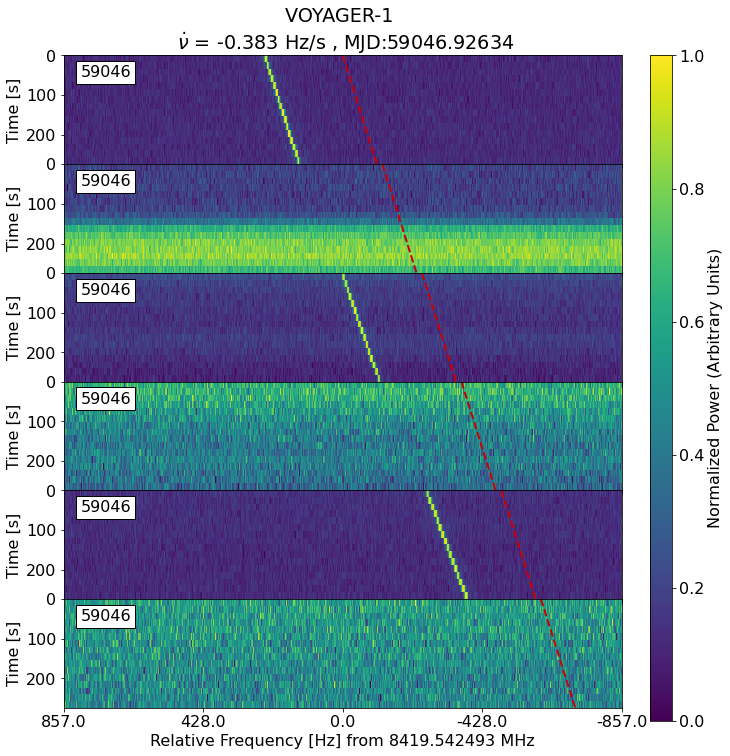

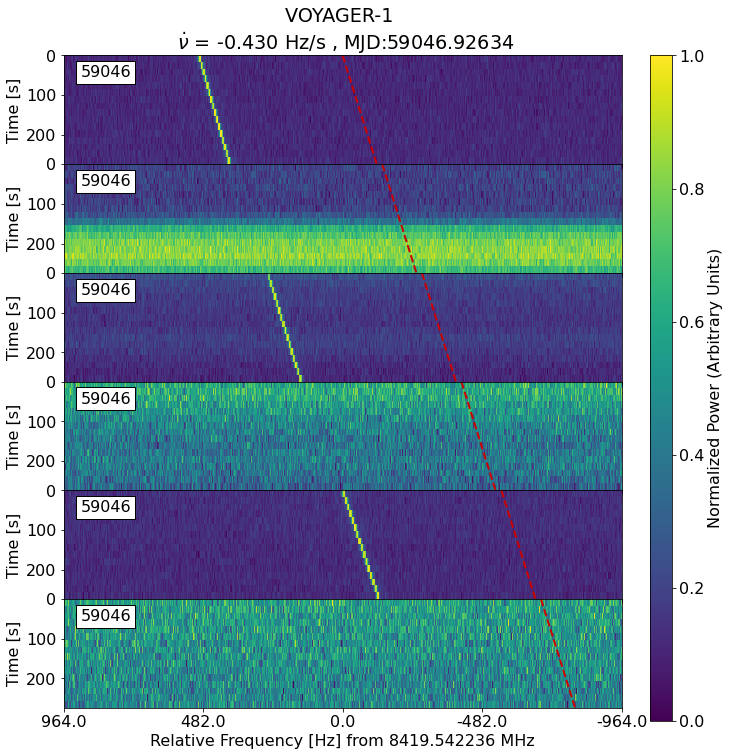

In [16]:
import os
from sofias_code.plot_event_pipeline import plot_event_pipeline

# and finally we plot
plot_event_pipeline('/home/elavie/DIAG_VOYAGER-1_f3_snr10.csv',
                    '/home/elavie/Voyager2020.lst',
                    user_validation=True)


## 5. plot_spectrum

extracting integration 0...


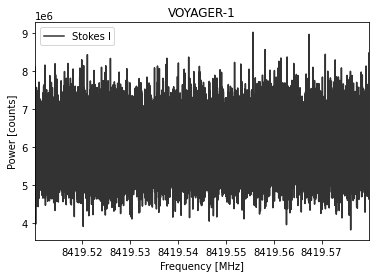

In [74]:
#Plotting spectrum for first OFF observation:

file_path = '/mnt_blpd14/datax2/voyager_2020/spliced_blc00010203040506o7o0111213141516o7o021222324252627_guppi_59046_80354_DIAG_VOYAGER-1_0012.rawspec.0000.h5'
f_start = 8419.51
f_stop = 8419.58
obs = Waterfall(file_path, f_start, f_stop)

obs.plot_spectrum(f_start=f_start, f_stop=f_stop)

extracting integration 0...


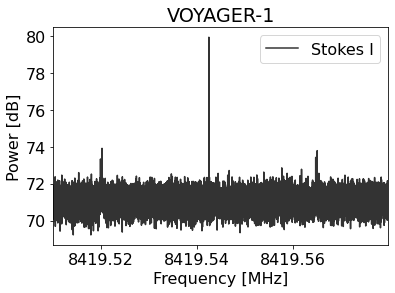

In [17]:
#Plotting spectrum for second ON observation:

file_path = '/mnt_blpd14/datax2/voyager_2020/spliced_blc00010203040506o7o0111213141516o7o021222324252627_guppi_59046_80672_DIAG_VOYAGER-1_0013.rawspec.0000.h5'
f_start = 8419.51
f_stop = 8419.58
obs = Waterfall(file_path, f_start, f_stop)

obs.plot_spectrum(f_start=f_start, f_stop=f_stop)

extracting integration 0...


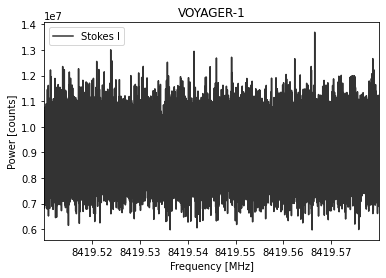

In [76]:
#Plotting spectrum for second OFF observation:

file_path = '/mnt_blpd14/datax2/voyager_2020/spliced_blc00010203040506o7o0111213141516o7o021222324252627_guppi_59046_80989_DIAG_VOYAGER-1_0014.rawspec.0000.h5'
f_start = 8419.51
f_stop = 8419.58
obs = Waterfall(file_path, f_start, f_stop)

obs.plot_spectrum(f_start=f_start, f_stop=f_stop)

extracting integration 0...


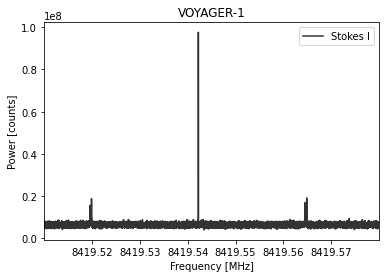

In [78]:
#Plotting spectrum for third ON observation:

file_path = '/mnt_blpd14/datax2/voyager_2020/spliced_blc00010203040506o7o0111213141516o7o021222324252627_guppi_59046_81310_DIAG_VOYAGER-1_0015.rawspec.0000.h5'
f_start = 8419.51
f_stop = 8419.58
obs = Waterfall(file_path, f_start, f_stop)

obs.plot_spectrum(f_start=f_start, f_stop=f_stop)

extracting integration 0...


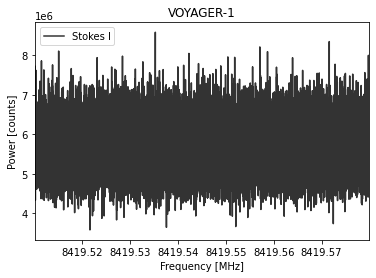

In [79]:
#Plotting spectrum for third OFF observation:

file_path = '/mnt_blpd14/datax2/voyager_2020/spliced_blc00010203040506o7o0111213141516o7o021222324252627_guppi_59046_81628_DIAG_VOYAGER-1_0016.rawspec.0000.h5'
f_start = 8419.51
f_stop = 8419.58
obs = Waterfall(file_path, f_start, f_stop)

obs.plot_spectrum(f_start=f_start, f_stop=f_stop)

## Final Project: Find An Alien!

Congratulations! You've succesfully completed the turboSETI pipeline walkthrough and found an almost-alien! Now that your appetite is whetted, why not search for a *real* alien?!

SETI has become an open-source project, which means that most of the data it has collected is publicly available! SETI has collected way more data than it has analyzed, so it's entirely possible that we have already detected an alien message but haven't noticed it yet!

That's where you and your spiffy new turboSETI skills come in! Navigate to http://seti.berkeley.edu/opendata. Then click on "Advanced Search Options" and uncheck all the boxes except for GBT and .hdf5 to make sure that you're getting similar files to the ones we've used in this tutorial. Then pick a dataset--any dataset! Just make sure you pay attention to the file size. You probably don't want to download any Gigabyte-sized files on your own machine...

Now go through the whole turboSETI pipeline: Download an `.h5` data file, run turboSETI on it, then run `find_event` on the `.dat` files from turboSETI and make your plots!

Remember, you can vary the `snr` and `max_drift` parameters when running turboSETI to expand/contract your search. You can also vary the `find_event` threshold to include/exclude more RFI. If you find any events at threshold 3, well... maybe let us know ;-) bsrc@berkeley.edu

<script type="text/javascript" src="http://cdn.mathjax.org/mathjax/latest/MathJax.js?config=default"></script>

## Bonus Physics Activity: Voyager's Velocity and Acceleration Relative to Earth!

Another fun thing we can do is combine our data with some physics to find Voyager's relative velocity and acceleration to Earth!

### Voyager's Relative Velocity to Earth

We'll use the Doppler Shift Equation for light:

$$v = \left(\frac{f_s - f_0}{f_0}\right)c$$

where $f_s$ is the observed Doppler shifted frequency and $f_0$ is the original unshifted frequency Voyager emits at.

Since Voyager is traveling away from us, we expect a frequency "Redshift". That is, the observed frequency should be less than the emitted frequency.

Looking at the [official documentation](https://voyager.gsfc.nasa.gov/Library/DeepCommo_Chapter3--141029.pdf) we can see that Voyager 1 emits at a "coherent downlink frequency" of $f_0 = 8420.432097 MHz$.

Looking at our data (the first event, for example), we can see that the Green Bank Telescope observed Voyager at about $f_s = 8419.5654 MHz$. Indeed, the observed frequency is lower (redshifted)!

Plug in the numbers to the Doppler formula--what velocity do you get? (I calculated 30.974 km/s). This is the speed Voyager was moving relative to Earth during the observation!

Now compare the velocity you found to NASA Jet Propulsion Laboratory's (JPL)! Go to [JPL Ephemeris](https://ssd.jpl.nasa.gov/horizons.cgi) and click to change the "target body" to Voyager 1. Then click to change the "time span". You'll have to click on "switch to descrete-times form" to manually enter the Mean Julian Date (MJD) of the date/time we observed Voyager. You can find the MJD at the top of a Waterfall plot. Once you've adjusted these, click "generate ephemeris" and scroll down. You should see a column labeled "deldot". This is JPL's calculation for Voyager 1's speed relative to Earth at the specified time. Now you can answer these questions, if you dare:

1. How does the velocity you calculated compare to JPL's? What's the percentage difference? What do you think might explain this difference?

2. When one Googles "Voyager 1 velocity" it says ~17 km/s. Explain this apparent discrepancy with our results.

### Voyager's Relative Acceleration to Earth

Taking the derivative with respect to time of the Doppler Shift Equation gives us what we might call the "Doppler Drift Equation":


$$\frac{dv}{dt} = \frac{d}{dt}\left(\frac{f_s - f_0}{f_0}\right)c$$

Since $f_0$ and $c$ are constants, we can rewrite the equation:

$$\frac{dv}{dt} = \frac{c}{f_0} \frac{d}{dt}f_s$$

Notice that the time derivate of frequency shift $\frac{d}{dt}f_s$ is what we've been calling the drift rate, $\dot{v}$ ! You can find this at the top of a Waterfall plot.

Plug in numbers from our data to find Voyager's acceleration $\frac{dv}{dt}$ relative to Earth. What do you find?

I calculated a relative acceleration of $1.3 x 10^{-5} km/s^{2}$. (**THIS SEEMS LOW TO ME! PLEASE CHECK MY MATH**)

1. Does Voyager's relative acceleration make sense given your recently acquired knowledge of its relative velocity? Why or why not?

2. What are all the possible sources of relative acceleration between Earth and Voyager that you can think of?

## Conclusion

We found Voyager 1 and *only* Voyager 1 from over 7,000 RFI signal hits during the observation. Who says you can't find a needle in a haystack--Or an alien in a galaxy?

## Gratitude

Steve Croft, Shane Smith, texadactyl, Ellie White, Nikhita Madhanpall
